In [84]:
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from matplotlib import gridspec

import numpy as np

def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../trajectories")   
import optimized_spherical_paths as osp


PA  = np.array([0,0,0])     # person A position
PB  = np.array([3,0,0])     # person B position
C0 = np.array([-1.2,-0.2,0])  # Starting camera position is *outside* of PA_1
C1 = np.array([1.5,-0.2,0])    # Ending camera position
min_dist = 1

params = {
  'min_dist':min_dist, 
  'nsamples':50, 
  'coord':'NED_mm',
  'force_paths_only_go_up':True
}

position_trajectories = osp.calculate_position_trajectory_as_optimized_blend_of_spherical_trajectories(
     PA, PB, C0, C1, osp.real_optimizer_constrained_at_endpoints, params)

## sigma is the resulting 3D trajectory.
sigma, wA, sigmaAvg, sigmaA, sigmaB, u = position_trajectories

c_b = (31/255.,119/255.,180/255.)
c_o = (255/255.,127/255.,14/255.)
c_r = (214/255.,39/255.,40/255.)
c_p = (148/255.,103/255.,189/255.)

  Could not determine Jacobian structure from user input
  Calling snJac...
Solved in 0.9106s
Value of objective function: 0.00815895
   lambda_pos: 1.000000, lambda_snap: 1.000000, 
   objective: 0.000000, obj_pos: 0.000000, obj_snap: 0.000000


In [85]:
from matplotlib import colors
annotatesize = 16
def drawSetup(subfig, A, B, C0, C1, min_dist, fudgeX_pos=1.2, fudgeX_neg=0.2, fudgeY_pos=2,fudgeY_neg=2):
    subfig.set_aspect('equal')

    safetycolor = (211/255.,237/255.,206/255.)
    annotatesize = 16
    
    # Draw People Positions
    subfig.scatter([A[0], B[0]],[A[1], B[1]],c="black",linewidths=0,zorder=2)
    
    # Set up plot size
    subfig.set_xlim((np.min([A[0], B[0], C0[0], C1[0]])-fudgeX_neg,np.max([A[0], B[0], C0[0], C1[0]])+fudgeX_pos))
    subfig.set_ylim((np.min([A[1], B[1], C0[1], C1[1]])-fudgeY_neg,np.max([A[1], B[1], C0[1], C1[1]])+fudgeY_pos))

    subfig.annotate(s=r"$\vec{P}_A$", size=annotatesize, xy=A[0:2],xytext=(3,4),textcoords="offset points")
    subfig.annotate(s=r"$\vec{P}_B$", size=annotatesize, xy=B[0:2],xytext=(3,4),textcoords="offset points")
    
    # Draw Camera positions
    subfig.scatter([C0[0],C1[0]],[C0[1],C1[1]],c="black",linewidths=0,zorder=2)
    subfig.annotate(s=r"$\vec{C}_0$", size=annotatesize, xy=C0[0:2],xytext=(3,4),textcoords="offset points")
    subfig.annotate(s=r"$\vec{C}_1$", size=annotatesize, xy=C1[0:2],xytext=(4,-10),textcoords="offset points")

    line_AB = plt.Line2D([A[0], B[0]],[A[1], B[1]], c="black",alpha=0.3)
    subfig.add_artist(line_AB)

    # Draw Circles    
    circle_PA_1=plt.Circle(A,min_dist,color=safetycolor,alpha=1,zorder=1)
    circle_PB_1=plt.Circle(B,min_dist,color=safetycolor,alpha=1,zorder=1)
    subfig.add_artist(circle_PA_1)
    subfig.add_artist(circle_PB_1)
    
def drawLegend(subfig):
    sA_legend = mpatches.Patch(color="green", label="sigmaA")
    sB_legend = mpatches.Patch(color="blue", label="sigmaB")
    SA_legend  = mpatches.Patch(color="red", label="sigma Averaged")
    SW_legend  = mpatches.Patch(color="purple", label="sigma Optimized")

    subfig.legend(handles=[sA_legend,sB_legend,SA_legend,SW_legend])


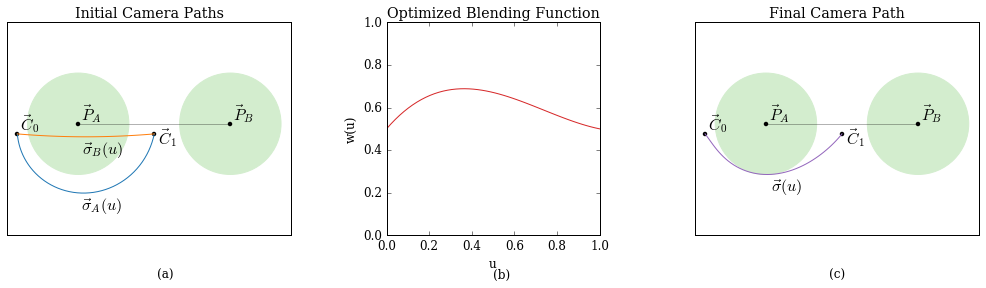

In [86]:
pylab.rcParams['figure.figsize'] = 14, 4
matplotlib.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], height_ratios=[1]) 
fig = plt.figure()

# fig.suptitle("", fontsize=18)

f1 = fig.add_subplot(gs[0])
f2 = fig.add_subplot(gs[1])
f3 = fig.add_subplot(gs[2])
#f4 = fig.add_subplot(gs[3])

# FIGURE 1
drawSetup(f1, PA, PB, C0, C1, min_dist)
f1.set_title('Initial Camera Paths')
f1.plot(sigmaA[:,0], sigmaA[:,1], c=c_b)
f1.plot(sigmaB[:,0], sigmaB[:,1], c=c_o)


f1.annotate(s=r"$\vec{\sigma}_A(u)$", size=annotatesize, xy=(sigmaA[25,0], sigmaA[25,1]),xytext=(0,-16),textcoords="offset points")
f1.annotate(s=r"$\vec{\sigma}_B(u)$", size=annotatesize, xy=(sigmaB[23,0], sigmaB[23,1]),xytext=(0,-16),textcoords="offset points")

f1.get_xaxis().set_ticks([])
f1.get_yaxis().set_ticks([])


# FIGURE 2
f2.set_aspect('equal')
f2.set_title("Optimized Blending Function")
f2.set_xlim(0,1)
f2.set_ylim(0,1)
f2.plot(np.linspace(0,1), wA, c=c_r)
f2.set_ylabel('w(u)')
f2.set_xlabel('u')

#f2.plot(np.linspace(0,1), np.linspace(0.5,0.5),':',c="black")

# FIGURE 3
drawSetup(f3, PA, PB, C0, C1, min_dist)
f3.set_title("Final Camera Path")
#f3.plot(sigmaAvg[:,0], sigmaAvg[:,1], ':', c="black")
f3.plot(sigma[:,0], sigma[:,1], c=c_p)
f3.get_xaxis().set_ticks([])
f3.get_yaxis().set_ticks([])
f3.annotate(s=r"$\vec{\sigma}(u)$", size=annotatesize, xy=(sigma[25,0], sigma[25,1]),xytext=(0,-16),textcoords="offset points")

plt.figtext(1/6., 0.01, "(a)");
plt.figtext(3/6., 0.01, "(b)");
plt.figtext(5/6., 0.01, "(c)");

#drawWorldTrajectoryGivenSubfigures(f3, PA, PB, C0, C1, min_dist, sigma, "red")
#gca().set_position((.1, .3, .8, .6)) # to make a bit of room for extra text


fig.tight_layout()
pylab.savefig("optimization_plot.pdf")

In [88]:

min_dist = 1                    # let's set a minimum distance of 1m
PA  = np.array([0,0,0])     # person A position
PB  = np.array([2,0,0])     # person B position
C0 = np.array([-1,-0.001,0])  # Starting camera position is *outside* of PA_1
C1 = np.array([3,-0.001,0])    # Ending camera position

params = {
  'min_dist':min_dist, 
  'nsamples':50, 
  'coord':'NED_mm',
  'force_paths_only_go_up':True
}

position_trajectories = osp.calculate_position_trajectory_as_optimized_blend_of_spherical_trajectories(
     PA, PB, C0, C1, osp.real_optimizer_constrained_at_endpoints, params)

## sigma is the resulting 3D trajectory.
sigma, wA, sigmaAvg, sigmaA, sigmaB, u = position_trajectories

  Could not determine Jacobian structure from user input
  Calling snJac...
Solved in 0.6144s
Value of objective function: 0.00000000
   lambda_pos: 1.000000, lambda_snap: 1.000000, 
   objective: 0.000000, obj_pos: 0.000000, obj_snap: 0.000000


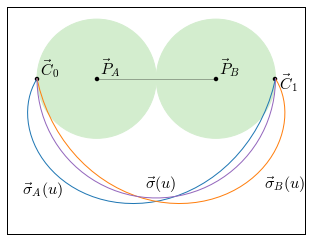

In [107]:
pylab.rcParams['figure.figsize'] = 4.5, 4
matplotlib.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')

gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1]) 
fig = plt.figure()

# fig.suptitle("", fontsize=18)

f1 = fig.add_subplot(gs[0])

# FIGURE 1
drawSetup(f1, PA, PB, C0, C1, min_dist, fudgeX_pos=0.5, fudgeX_neg=0.5, fudgeY_pos=1.2,fudgeY_neg=2.6)
f1.set_title('')
f1.plot(sigmaA[:,0], sigmaA[:,1], c=c_b)
f1.plot(sigmaB[:,0], sigmaB[:,1], c=c_o)
f1.plot(sigma[:,0], sigma[:,1], c=c_p)

f1.annotate(s=r"$\vec{\sigma}_A(u)$", size=annotatesize, xy=(sigmaA[15,0], sigmaA[15,1]),xytext=(-20,-36),textcoords="offset points")
f1.annotate(s=r"$\vec{\sigma}_B(u)$", size=annotatesize, xy=(sigmaB[35,0], sigmaB[35,1]),xytext=(-10,-36),textcoords="offset points")
f1.annotate(s=r"$\vec{\sigma}(u)$", size=annotatesize, xy=(sigma[25,0], sigma[25,1]),xytext=(-15,10),textcoords="offset points")


f1.get_xaxis().set_ticks([])
f1.get_yaxis().set_ticks([])


#drawWorldTrajectoryGivenSubfigures(f3, PA, PB, C0, C1, min_dist, sigma, "red")
#gca().set_position((.1, .3, .8, .6)) # to make a bit of room for extra text

fig.tight_layout()
pylab.savefig("sample_traj.pdf")

### def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples
import toric.shims

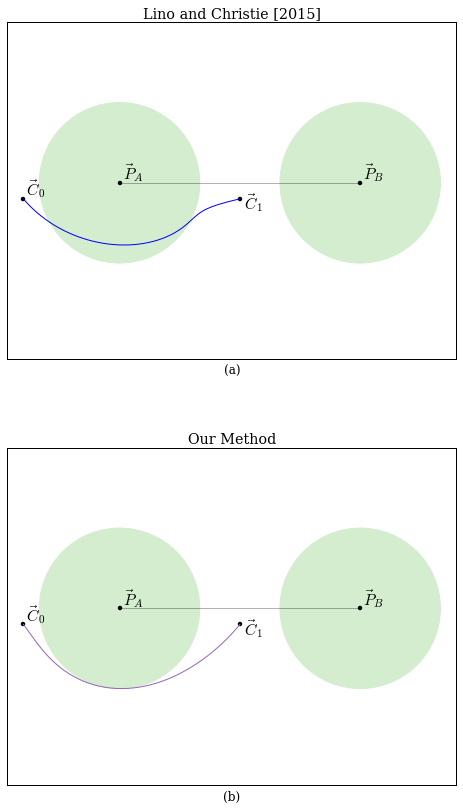

In [231]:



min_dist = 1                    # let's set a minimum distance of 1m
PAt = toric.Vector3(0,0,0)     # person A position
PBt = toric.Vector3(3,0,0)     # person B position
C0t = toric.Vector3(-1.2,-0.2,0)  # Starting camera position is *outside* of PA_1
C1t = toric.Vector3( 1.5,-0.2,0)    # Ending camera position



C_0t = toric.Toric3_FromWorldPosition(C0t, PAt, PBt)
C_1t = toric.Toric3_FromWorldPosition(C1t, PAt, PBt)

interp = toric.ToricInterpolator(PAt, PBt, C_0t, C_1t)

t = np.linspace(0,1)

sigmaToric = np.array([toric.Toric3_ToWorldPosition(interp.interpolate(a),PAt,PBt).np() for a in t])

pylab.rcParams['figure.figsize'] = 6.6, 12
matplotlib.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')

gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[1,1]) 
fig = plt.figure()
# fig.suptitle("", fontsize=18)

f1 = fig.add_subplot(gs[0])
f2 = fig.add_subplot(gs[1])

f1.get_xaxis().set_ticks([])
f1.get_yaxis().set_ticks([])
f2.get_xaxis().set_ticks([])
f2.get_yaxis().set_ticks([])

drawSetup(f1, PA, PB, C0, C1, min_dist)
f1.set_title('Lino and Christie [2015]')
f1.plot(sigmaToric[:,0],sigmaToric[:,1])
f1.set_xlabel('(a)')

drawSetup(f2, PA, PB, C0, C1, min_dist)
f2.set_title('Our Method')
f2.plot(sigma[:,0],sigma[:,1], c=c_p)
f2.set_xlabel('(b)')

fig.tight_layout()
pylab.savefig("interpolation_toric_space.pdf")